In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
import numpy as np

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
inter_color = '#0055A4'

In [4]:
file_path = '/content/gdrive/MyDrive/FC Internazionale Data Science Challenge/df_finale.csv'
df = pd.read_csv(file_path, sep=',')
df

,Player,Nation,Squad 22-23,Comp,Actual Squad,Age,Height,Weight,Foot,MP,...,2CrdY,Fls,Fld,Off,Crs,TklW,Recov,AerWon,AerLost,Value (M)
0,Francesco Acerbi,ITA,Inter,Serie A,Inter,36,192.0,88.0,Left,28,...,0.0,2.47,2.01,0.08,1.29,1.97,13.10,3.69,2.68,9.5
1,Tosin Adarabioyo,ENG,Fulham,Premier League,Fulham,26,196.0,80.0,Right,29,...,0.0,1.59,1.26,0.00,0.31,2.43,11.18,2.44,0.80,10.0
2,Emmanuel Agbadou,CIV,Reims,Ligue 1,Stade de Reims,27,192.0,86.0,Right,20,...,0.0,1.01,0.28,0.00,0.00,11.63,18.20,1.85,11.35,7.0
3,Joseph Aidoo,GHA,Celta Vigo,La Liga,Celta de Vigo,28,181.0,80.0,Right,24,...,0.0,1.27,1.02,0.00,1.33,3.38,12.50,2.75,3.85,15.0
4,Manuel Akanji,SUI,Manchester City,Premier League,Manchester City,28,187.0,91.0,Right,31,...,0.0,2.56,2.14,0.09,7.82,2.79,12.90,2.03,2.32,30.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,Mateusz Wieteska,POL,Clermont Foot,Ligue 1,Cagliari,27,187.0,77.0,Right,43,...,0.0,0.57,1.29,0.32,5.23,0.86,8.42,2.90,2.43,2.0
229,Koni De Winter,BEL,Empoli,Serie A,Genoa,22,191.0,75.0,Right,33,...,0.0,3.10,2.20,0.00,4.01,1.99,9.61,1.93,1.63,3.2
230,Christopher Wooh,CMR,Rennes,Ligue 1,Rennes,22,191.0,92.0,Right,27,...,0.0,2.16,2.31,0.15,3.36,0.98,7.71,3.44,1.86,4.4
231,Dan Axel Zagadou,FRA,Stuttgart,Bundesliga,VfB Stuttgart,25,196.0,90.0,Left,22,...,0.0,2.35,2.17,0.50,0.17,0.84,6.92,4.04,4.69,12.0


# Classifico i vari tipi di dati

Prima di tutto separo i dati anagrafici da quelli statistici e tecnici, che divido in difensivi e offensivi. In altri_dati avrò invece dati che mostrerò alla fine e che tratterò appositamente

In [5]:
df.columns

Index(['Player', 'Nation', 'Squad 22-23', 'Comp', 'Actual Squad', 'Age',
       'Height', 'Weight', 'Foot', 'MP', 'Starts', 'Min', 'Goals', 'Shots',
       'SoT', 'ShoFK', 'ShoPK', 'PKatt', 'PasTotCmp', 'PasTotAtt',
       'PasTotDist', 'Assists', 'PasProg', 'PasAtt', 'PasLive', 'PasDead',
       'PasCmp', 'SCA', 'GCA', 'Tkl', 'TklWon', 'TklDef3rd', 'TklMid3rd',
       'TklAtt3rd', 'TklDriPast', 'Blocks', 'BlkSh', 'BlkPass', 'Int', 'Clr',
       'Err', 'Touches', 'TouDefPen', 'TouDef3rd', 'TouMid3rd', 'TouAtt3rd',
       'Carries', 'CarTotDist', 'CarPrgDist', 'CarProg', 'Car3rd', 'CarDis',
       'RecProg', 'CrdY', 'CrdR', '2CrdY', 'Fls', 'Fld', 'Off', 'Crs', 'TklW',
       'Recov', 'AerWon', 'AerLost', 'Value (M)'],
      dtype='object')

In [6]:
dati_anagrafici = df[['Player', 'Nation', 'Squad 22-23', 'Comp', 'Actual Squad']]
dati_offensivi = df[['Goals', 'Shots',
       'SoT', 'ShoFK', 'ShoPK', 'PKatt', 'PasTotCmp', 'PasTotAtt',
       'PasTotDist', 'Assists', 'PasProg', 'PasAtt', 'PasLive', 'PasDead',
       'PasCmp', 'SCA', 'GCA', 'Touches', 'TouDefPen', 'TouDef3rd', 'TouMid3rd', 'TouAtt3rd',
       'Carries', 'CarTotDist', 'CarPrgDist', 'CarProg', 'Car3rd', 'CarDis',
       'RecProg', 'Fld', 'Off', 'Crs']]
dati_difensivi = df[['Tkl', 'TklWon', 'TklDef3rd', 'TklMid3rd',
       'TklAtt3rd', 'TklDriPast', 'Blocks', 'BlkSh', 'BlkPass', 'Int', 'Clr',
       'Err', 'CrdY', 'CrdR', '2CrdY', 'Fls','TklW', 'Recov', 'AerWon', 'AerLost']]
altri_dati = df[['Age', 'Height', 'Weight', 'Foot', 'MP', 'Starts', 'Min', 'Value (M)']]

In [7]:
numero_dati_anagrafici = len(dati_anagrafici.columns)
numero_dati_offensivi = len(dati_offensivi.columns)
numero_dati_difensivi = len(dati_difensivi.columns)
numero_altri_dati = len(altri_dati.columns)

print("numero dei dati anagrafici:", numero_dati_anagrafici)
print("numero dei dati offensivi:", numero_dati_offensivi)
print("numero dei dati difensivi:", numero_dati_difensivi)
print("numero degli altri dati:", numero_altri_dati)

numero dei dati anagrafici: 5
numero dei dati offensivi: 32
numero dei dati difensivi: 20
numero degli altri dati: 8


# Valuto i valori di Acerbi per gestire i dati in altri_dati

In [8]:
acerbi = df[df['Player'] == 'Francesco Acerbi']
acerbi[['Player', 'Age', 'Height', 'Weight', 'Foot', 'Value (M)']]

,Player,Age,Height,Weight,Foot,Value (M)
0,Francesco Acerbi,36,192.0,88.0,Left,9.5


In [9]:
# Estraggo altezza, peso e piede preferito di Acerbi
acerbi_altezza = acerbi['Height'].values[0]
acerbi_peso = acerbi['Weight'].values[0]
acerbi_piede = acerbi['Foot'].values[0]

In [10]:
# Controllo che effettivamente il piede preferito sia solo o destro o sinistro (potrebbe esserci qualcosa tipo ambidestro)
valori_foot = df['Foot'].value_counts()
valori_foot = valori_foot.sort_index(ascending=True)
print("Foot può avere i seguenti valori:")
print(valori_foot)

Foot può avere i seguenti valori:
Left      66
Right    167
Name: Foot, dtype: int64


In [11]:
# Trasformo i valori della colonna 'Foot' in numerici
df['Foot'] = df['Foot'].apply(lambda x: 1 if x == 'Left' else 0)

# Verifico lla trasformazione
print(df['Foot'].unique())

[1 0]


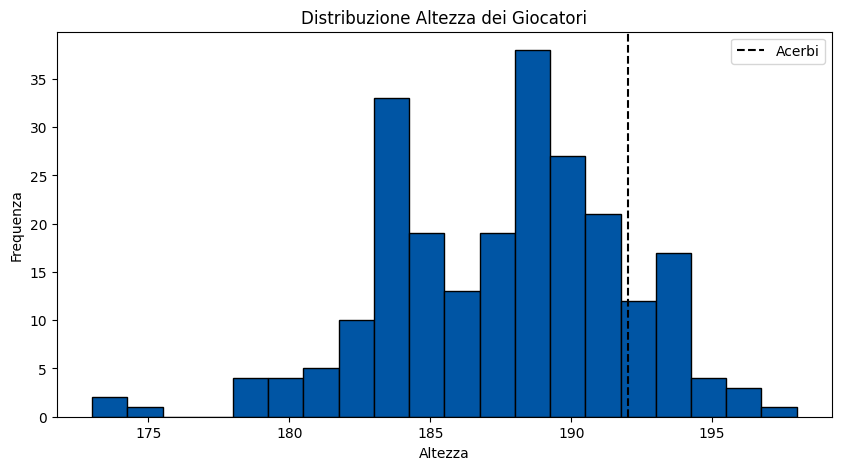

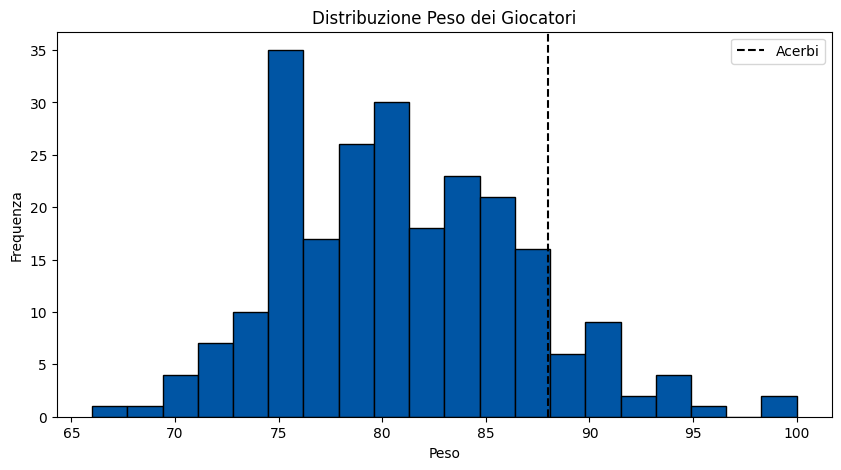

In [12]:
# Istogramma per l'altezza
plt.figure(figsize=(10, 5))
plt.hist(df['Height'], bins=20, color=inter_color, edgecolor='black')
plt.axvline(x=acerbi_altezza, color='black', linestyle='--', label='Acerbi')
plt.xlabel('Altezza')
plt.ylabel('Frequenza')
plt.title('Distribuzione Altezza dei Giocatori')
plt.legend()
plt.show()

# Istogramma per il peso
plt.figure(figsize=(10, 5))
plt.hist(df['Weight'], bins=20, color=inter_color, edgecolor='black')
plt.axvline(x=acerbi_peso, color='black', linestyle='--', label='Acerbi')
plt.xlabel('Peso')
plt.ylabel('Frequenza')
plt.title('Distribuzione Peso dei Giocatori')
plt.legend()
plt.show()

Noto che Acerbi ha un'altezza e un peso elevati rispetto alla distribuzione dei centrali dei 5 campionati. Come anticipato nel notebook precedente, devo tenere conto della cosa, se voglio valutare la similarità che gli altri giocatori possono avere con lui. Creo quindi uno score per tenerlo in considerazione

In [13]:
# Calcolo la distanza euclidea normalizzata per altezza e peso
distanza_altezza = np.abs(df['Height'] - acerbi_altezza)
distanza_peso = np.abs(df['Weight'] - acerbi_peso)

# Assegno uno score basato sulla distanza per altezza e peso, con un parametro alpha variabile
alpha = 0.25
score_altezza = np.exp(-alpha * distanza_altezza)
score_peso = np.exp(-alpha * distanza_peso)

Faccio un'operazione simile per tenere in considerazione il piede preferito di Acerbi. In questo modo prediligerò quindi giocatori mancini, non andando però ad escludere a priori i destri

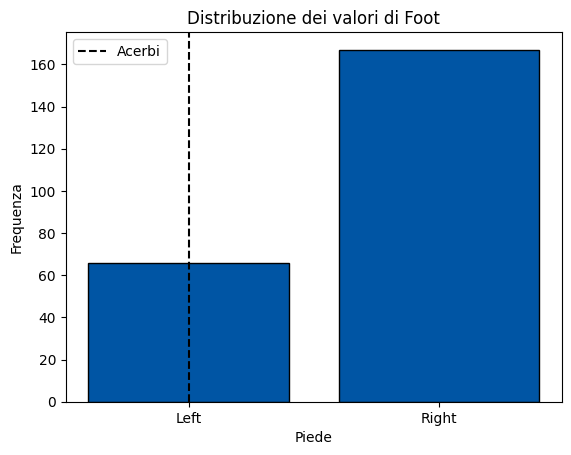

In [14]:
plt.bar(valori_foot.index, valori_foot.values, color=inter_color, edgecolor='black')
plt.axvline(x=acerbi_piede, color='black', linestyle='--', label='Acerbi')

plt.xlabel('Piede')
plt.ylabel('Frequenza')
plt.title('Distribuzione dei valori di Foot')

plt.legend()
plt.show()

In [15]:
# Se il piede è lo stesso di Acerbi, assegno uno score di 0.66, altrimenti 0.33
score_piede = np.where(df['Foot'] == acerbi_piede, 0.33, 0.66)

In [17]:
# Calcolo uno score complessivo considerando altezza, peso e piede preferito
score_complessivo = score_altezza * score_peso * score_piede

In [18]:
# Converto score_complessivo in un array NumPy
score_complessivo = score_complessivo.to_numpy()

# Trasformo score_complessivo_array in un array 2D con una sola colonna
score_complessivo = score_complessivo.reshape(-1, 1)

# Normalizzo le statistiche

Prima di effettivamente eseguire modelli sul dataset, procedo normalizzando i dati offensivi e difensivi con la tecnica min-max, dato che questi cadono in intervalli diversi tra loro.

Inoltre, devo far pesare di più i dati difensivi, più importanti per un centrale di difesa, ma meno presenti nel dataset

In [19]:
# Normalizzo i dati offensivi utilizzando la normalizzazione min-max
scaler_offensive = MinMaxScaler()
dati_offensivi_normalizzati = scaler_offensive.fit_transform(dati_offensivi)
dati_offensivi_normalizzati_df = pd.DataFrame(dati_offensivi_normalizzati, columns=dati_offensivi.columns)

# Normalizzo i dati difensivi utilizzando la normalizzazione min-max
scaler_defensive = MinMaxScaler()
dati_difensivi_normalizzati = scaler_defensive.fit_transform(dati_difensivi)
dati_difensivi_normalizzati_df = pd.DataFrame(dati_difensivi_normalizzati, columns=dati_difensivi.columns)

# Aumento il peso dei dati difensivi
dati_difensivi_normalizzati_pesati_df = dati_difensivi_normalizzati_df * 3.2

# Concateno i dati normalizzati con gli altri dati anagrafici
dati_normalizzati = pd.concat([dati_anagrafici, altri_dati, dati_offensivi_normalizzati_df, dati_difensivi_normalizzati_pesati_df], axis=1)

In [20]:
acerbi_normalizzato = dati_normalizzati[dati_normalizzati['Player'] == 'Francesco Acerbi']

In [21]:
# Aggiungo score_complessivo al dataset
df['score_complessivo'] = score_complessivo

In [22]:
# Riscalo lo score complessivo in modo che cada nell'intervallo [0, 1], ora cade nell'intervallo [0, 2/3]
min_score = df['score_complessivo'].min()
max_score = df['score_complessivo'].max()
df['score_complessivo'] = (df['score_complessivo'] - min_score) / (max_score - min_score)

# Calcolo le distanze

In [23]:
# Seleziono le colonne non presenti nei dati anagrafici e negli altri dati, ovvero quelle che riguardano le statistiche difensive ed offesnsive
colonnesenza_anagrafici_altri = [col for col in dati_normalizzati.columns if col not in dati_anagrafici.columns and col not in altri_dati.columns]

# Seleziono solo i dati offensivi e difensivi per il dataset e per Acerbi
dati_off_def_normalizzati = dati_normalizzati[colonnesenza_anagrafici_altri]
acerbi_off_def_normalizzato = acerbi_normalizzato[colonnesenza_anagrafici_altri]

In [24]:
# Calcolo della similarità del coseno, che aggiungo al dataset
similarita_coseno = np.dot(dati_off_def_normalizzati.values, acerbi_off_def_normalizzato.values.T) / (np.linalg.norm(dati_off_def_normalizzati.values, axis=1)[:, np.newaxis] * np.linalg.norm(acerbi_off_def_normalizzato.values))
df['similarita_coseno'] = similarita_coseno

In [25]:
# Creo uno score di similarità che tenga in considerazione i due score calcolati in precedenza, pesati opportunamente
peso_score_complessivo = 0.1
peso_similarita_coseno = 0.9
similarita_ponderata_coseno = ((peso_score_complessivo * score_complessivo) + (peso_similarita_coseno * similarita_coseno))
df['similarita_ponderata_coseno'] = similarita_ponderata_coseno

# Ottengo il risultato ed esporto i dataset

In [26]:
df = df.sort_values(by='similarita_ponderata_coseno', ascending=False).reset_index(drop=True)

# Seleziono le prime 6 righe
df_simili = df.head(6)

# Stampaoil DataFrame df_simili
df_simili[['Player','Nation','Actual Squad','Age','Height','Weight','Foot','Value (M)','score_complessivo','similarita_coseno','similarita_ponderata_coseno']]

,Player,Nation,Actual Squad,Age,Height,Weight,Foot,Value (M),score_complessivo,similarita_coseno,similarita_ponderata_coseno
0,Francesco Acerbi,ITA,Inter,36,192.0,88.0,1,9.5,1.000000,1.000000,0.966000
1,Stefan Bell,GER,FSV Mainz 05,32,192.0,88.0,0,2.1,1.000000,0.945164,0.916648
2,Maxence Lacroix,FRA,VfL Wolfsburg,24,190.0,88.0,0,15.5,0.606517,0.966306,0.909706
3,Matthijs de Ligt,NED,FC Bayern Munchen,24,189.0,89.0,0,57.5,0.367857,0.967496,0.895026
4,Robin Koch,GER,Eintracht Frankfurt,27,191.0,85.0,0,15.5,0.367857,0.965926,0.893613
5,Nico Schlotterbeck,GER,Borussia Dortmund,24,191.0,86.0,1,39.5,0.472348,0.957238,0.892690


In [27]:
from google.colab import files

In [28]:
df.to_csv('df_per_viz.csv', index=False)
files.download('df_per_viz.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
df_simili.to_csv('df_simili.csv', index=False)
files.download('df_simili.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>